In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

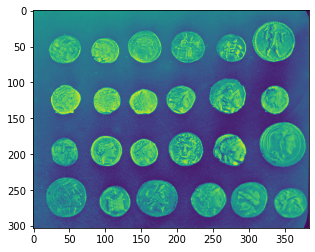

In [5]:
image = data.coins()
plt.imshow(image)
plt.show()

In [6]:
# Convert to float: Important for subtraction later which won't work with uint8
float_image = img_as_float(image)
filtered_image = gaussian_filter(float_image, 1)

In [7]:
seed = np.copy(filtered_image)
seed[1:-1, 1:-1] = filtered_image.min()
mask = filtered_image

In [8]:
seed = np.copy(filtered_image)
seed[1:-1, 1:-1] = filtered_image.min()
mask = filtered_image

In [9]:
dilated = reconstruction(seed, mask, method='dilation')

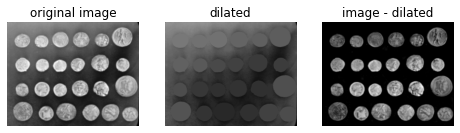

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(8, 2.5),sharex=True,sharey=True)

ax0.imshow(filtered_image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=filtered_image.min(), vmax=filtered_image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(filtered_image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

plt.show()

In [11]:
h = 0.4
seed = filtered_image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = filtered_image - dilated

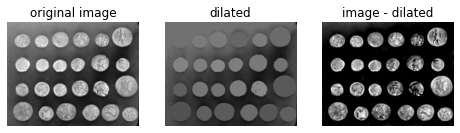

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(8, 2.5),sharex=True,sharey=True)

ax0.imshow(filtered_image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=filtered_image.min(), vmax=filtered_image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

plt.show()